**LINEAR REGRESSION USING INSURANCE DATASET**

In [7]:
import pandas as pd
import numpy as np

**Importing the Dataset**

In [8]:
# read the csv file
df = pd.read_csv('insurance.csv')

# print the first 5 rows of the data set
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df.sex = encoder.fit_transform(df.sex)
df.smoker = encoder.fit_transform(df.smoker)
df.region = encoder.fit_transform(df.region)

In [14]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [15]:
df.shape

(1338, 7)

In [16]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [17]:
theta0,theta1,theta2,theta3,theta4,theta5,theta6 = 39.207025,30.169656,1.094918,13269.928999,0.505232,0.204783,0.242900

In [18]:
x1,x2,x3,x4,x5,x6 = df.age, df.bmi, df.children, df.sex, df.smoker, df.region

In [19]:
import numpy as np
 
df['dist']=np.NaN
df['pred']=np.NaN

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges,dist,pred
0,19,0,27.900,0,1,3,16884.92400,NaN,NaN
1,18,1,33.770,1,0,2,1725.55230,NaN,NaN
2,28,1,33.000,3,0,2,4449.46200,NaN,NaN
3,33,1,22.705,0,0,1,21984.47061,NaN,NaN
4,32,1,28.880,0,0,1,3866.85520,NaN,NaN


In [21]:
for step in range(10):
    
    
    df['pred']= theta0+theta1*x1+theta2*x2+theta3*x3+theta4*x4+theta5*x5+theta6*x6
    
    df['dist']=(df.pred-df.charges)**2
    
    m = df.shape[0]
    
    cost = (df['dist'].sum())/(2*m)
    
    print('\n\n')
    print('For step : ', step)
    print('Cost is : {}'.format(cost))
    
    step_size = 0.001
    

    theta0 = theta0 - (step_size/m)*(np.sqrt(df['dist']).sum())
    theta1 = theta1 - (step_size/m)*((np.sqrt(df['dist'])*x1).sum())
    theta2 = theta2 - (step_size/m)*((np.sqrt(df['dist'])*x2).sum())
    theta3 = theta3 - (step_size/m)*((np.sqrt(df['dist'])*x3).sum())
    theta4 = theta4 - (step_size/m)*((np.sqrt(df['dist'])*x4).sum())
    theta5 = theta5 - (step_size/m)*((np.sqrt(df['dist'])*x5).sum())
    theta6 = theta6 - (step_size/m)*((np.sqrt(df['dist'])*x6).sum())
    print('Gradient Decent optimized thetas : ', theta0,theta1,theta2,theta3,theta4,theta5,theta6)




For step :  0
Cost is : 189953949.94434977
Gradient Decent optimized thetas :  24.395729620510053 -567.5560993421212 -460.2791042311358 13245.20732763775 -7.151495058147691 -4.080215116454506 -22.87746287898284



For step :  1
Cost is : 873008675.3800334
Gradient Decent optimized thetas :  -11.924291544564632 -2137.736958632687 -1606.9396491279117 13219.515293854356 -25.8208231417258 -15.041149158315125 -78.3872163227768



For step :  2
Cost is : 9544100391.41465
Gradient Decent optimized thetas :  -143.9558279035545 -7792.342799919128 -5748.672631300522 13091.466901665204 -92.65832012470058 -45.58993154746073 -280.00317297931855



For step :  3
Cost is : 123456801332.22403
Gradient Decent optimized thetas :  -625.3050879063373 -28296.882179692504 -20808.71714513041 12576.300610323597 -335.7584481514466 -146.91582229940147 -1015.9075515712427



For step :  4
Cost is : 1624331277186.7358
Gradient Decent optimized thetas :  -2374.672858452728 -102702.49132521382 -75502.84027049041

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

Correlation (Pearson)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


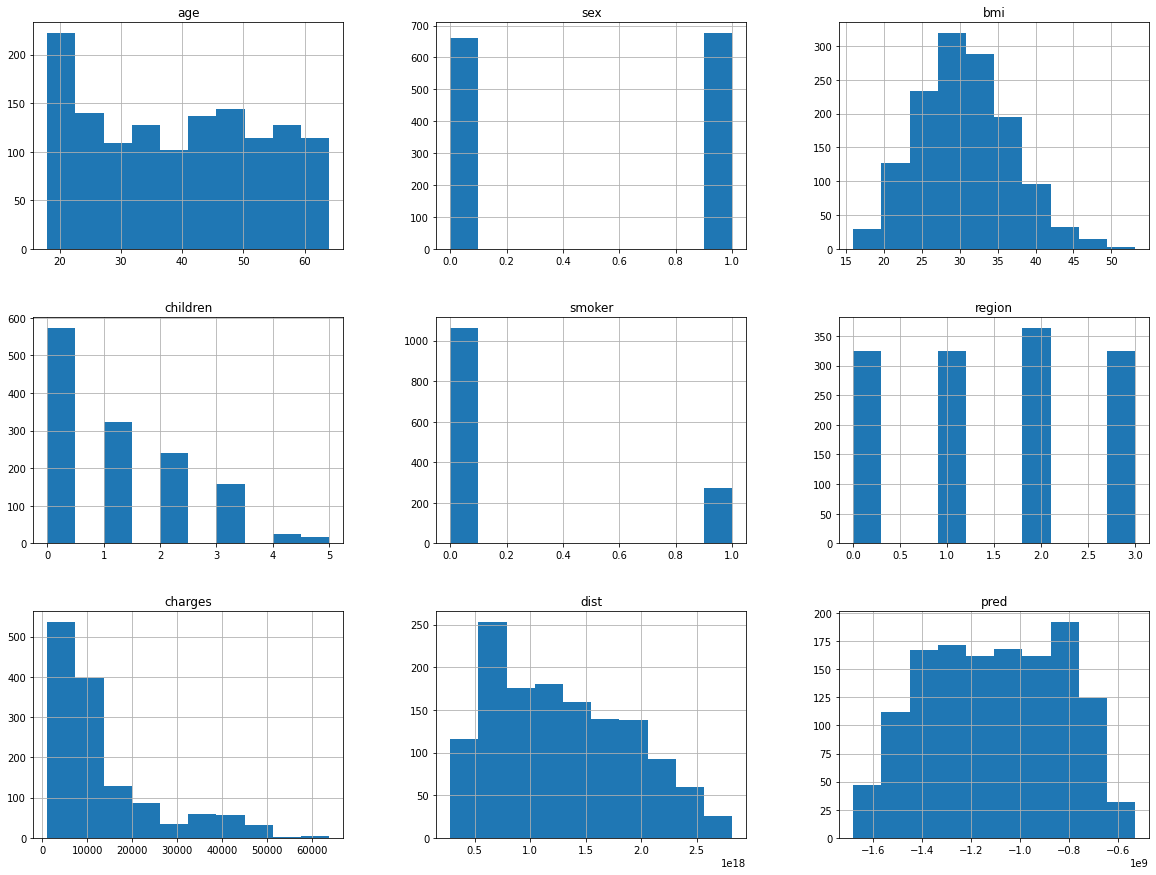

In [25]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

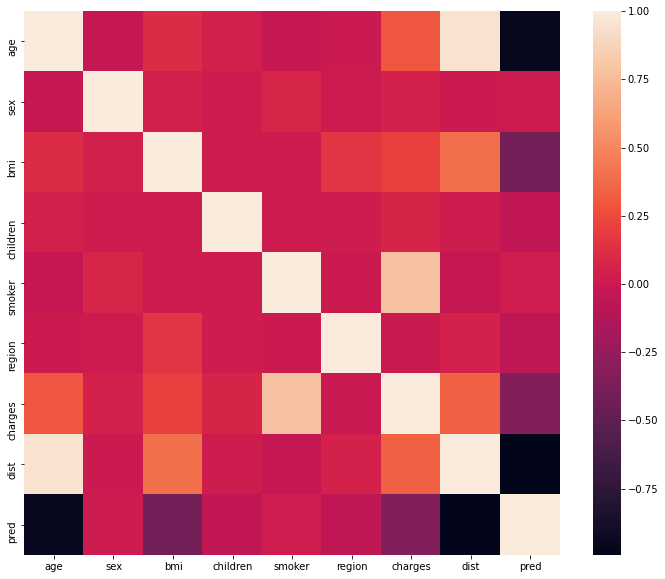

In [26]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr())

Bivariate Analysis

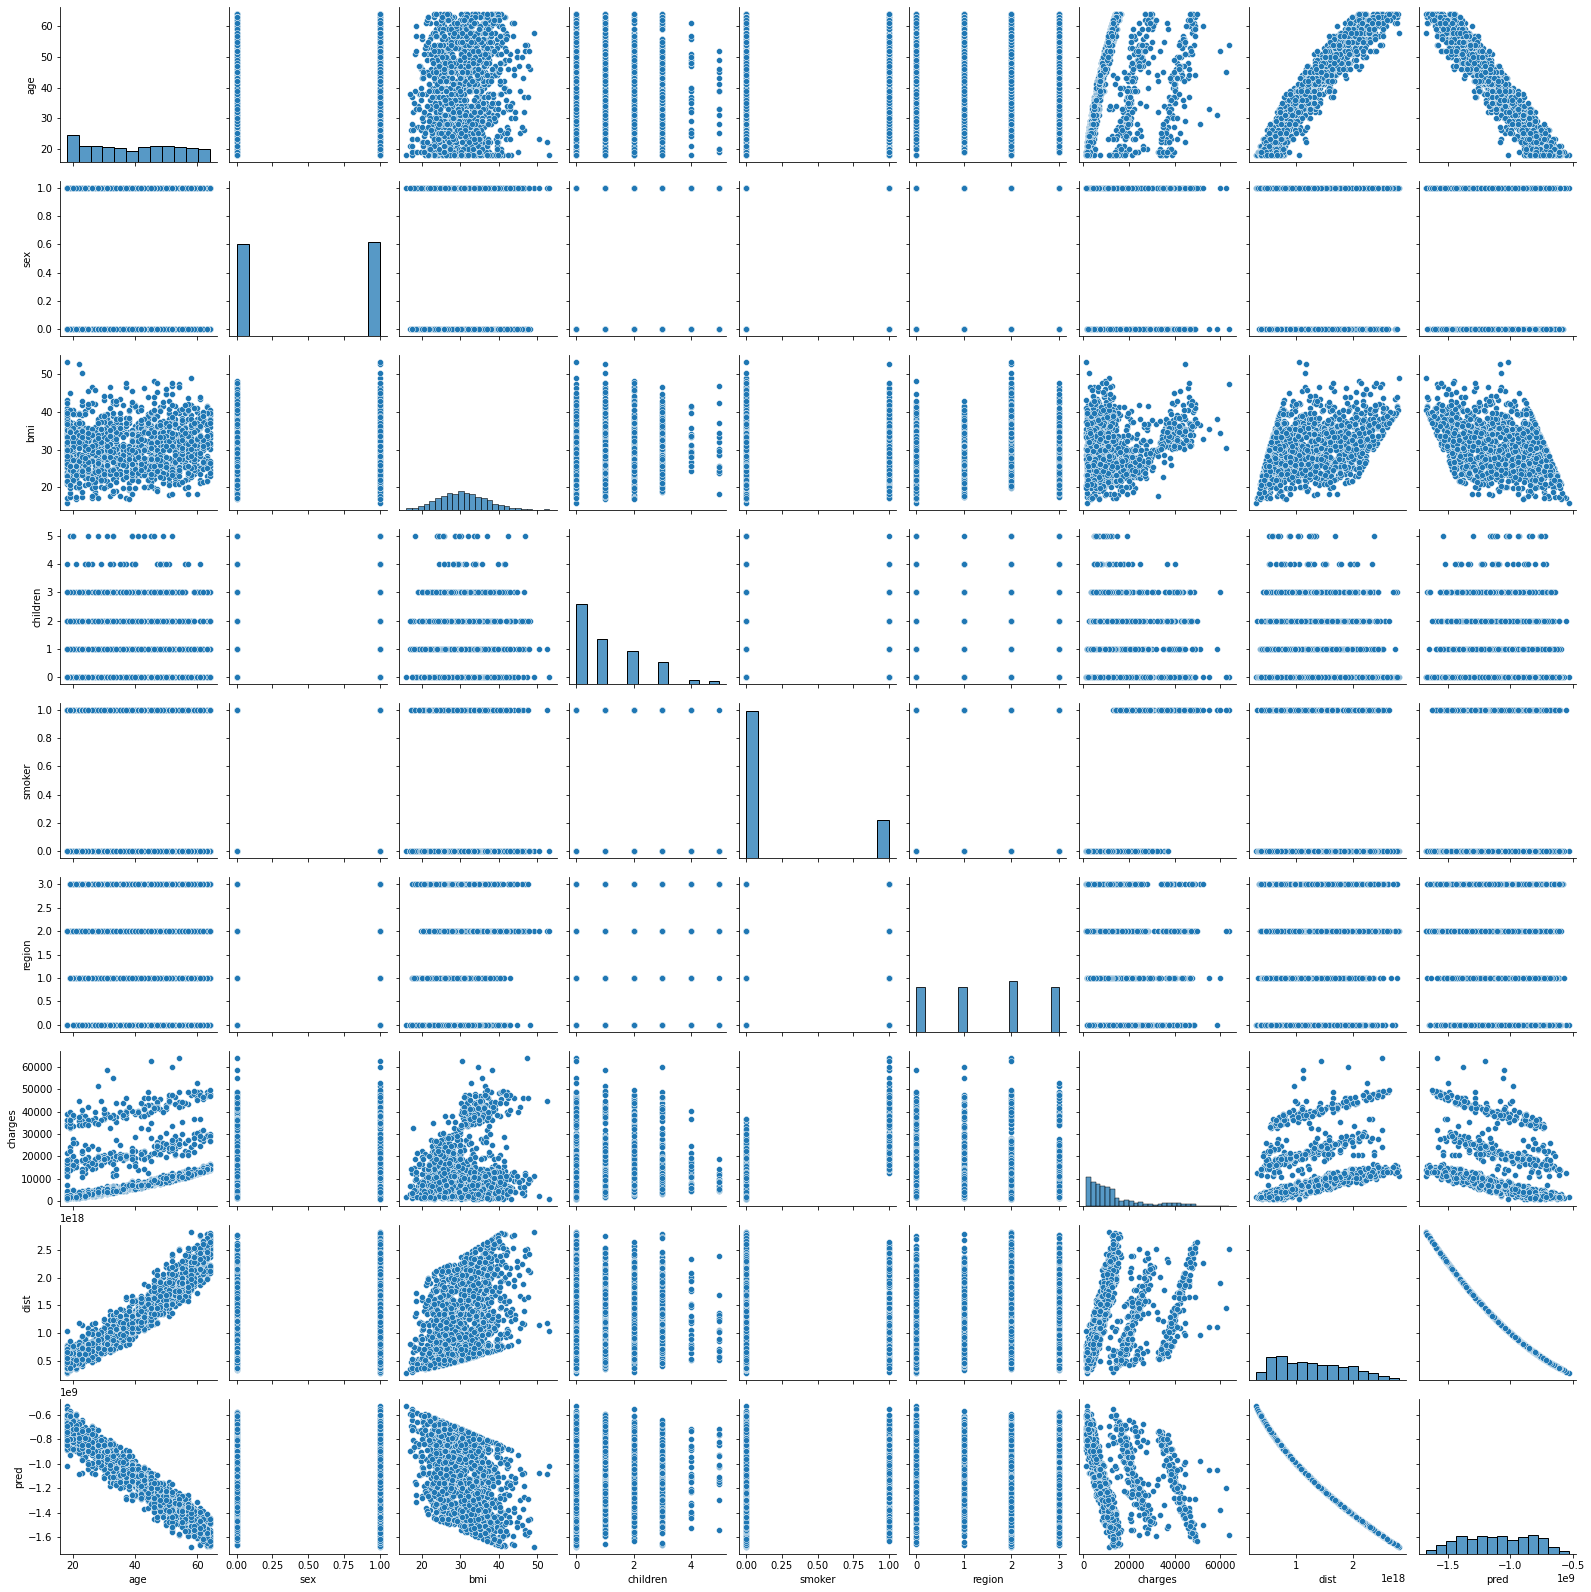

In [24]:
sns.pairplot(df)
plt.show()